In [1]:
from tensorflow.keras.models import load_model
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay, classification_report
import numpy as np

In [83]:
test = pd.read_csv("../Data/Test.csv")
model = load_model("../Models/Fake_news_detect_v6.keras")
with open('../tools/saved_vectorizer_v2.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

In [84]:
X_test_vec = vectorizer.transform(test.article)
y_test = test.label
X_test_vec.shape

(635, 20365)

In [85]:
pred = model.predict(X_test_vec)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [86]:
roc_auc_score(y_test, pred)

0.9911309523809524

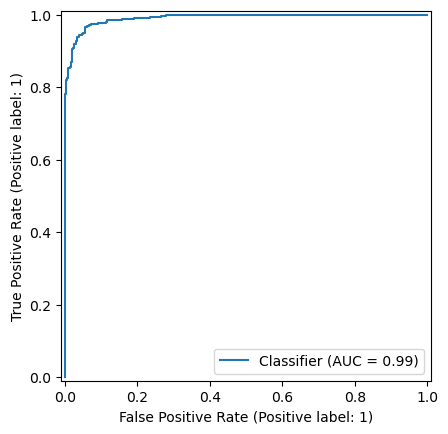

In [87]:
RocCurveDisplay.from_predictions(y_test, pred)

In [88]:
report = classification_report(y_test,np.round(pred), output_dict=True)
pd.DataFrame(report).T

,precision,recall,f1-score,support
0,0.958730,0.943750,0.951181,320.000000
1,0.943750,0.958730,0.951181,315.000000
accuracy,0.951181,0.951181,0.951181,0.951181
macro avg,0.951240,0.951240,0.951181,635.000000
weighted avg,0.951299,0.951181,0.951181,635.000000
